訓練集大小: 16, 測試集大小: 5
RMSE: 0.821


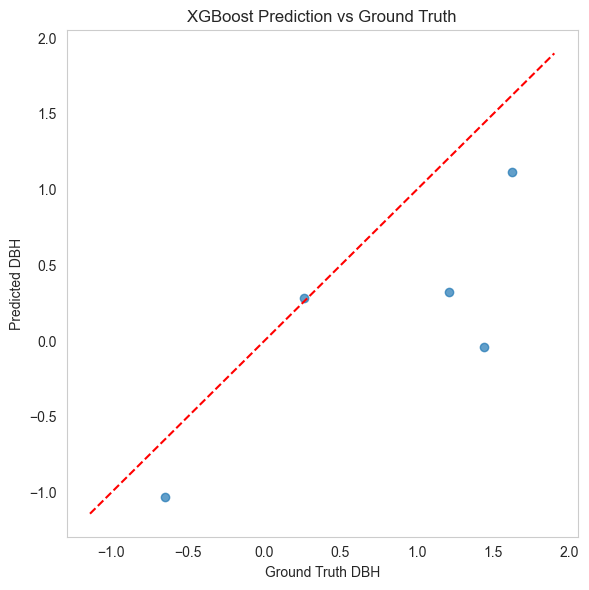

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# 讀取資料
df = pd.read_excel("dataset_newdev_no.xlsx")

# 建立誤差欄位
df["error"] = abs(df["dbh_cylinder_cm"] - df["dbh_gt_cm1"])
df["high_error"] = df["error"] > 1.5

# 選擇特徵與標籤
features = [ 
    "slice_ratio", "ellipse_fit_rmse", "num_points",  
    "normal_angle_variance", "cylinder_fit_rmse", 
    "pca_ratio_1", "cylinder_center_offset","bbb"
]
X = df[features]
y = df["aaa"]  # 可視需求改為 df["dbh_gt_cm1"]
strata = df["high_error"]

# 資料分割，保留 index 方便後續結合
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=strata, test_size=0.2, random_state=42
)
test_indices = X_test.index

print(f"訓練集大小: {len(X_train)}, 測試集大小: {len(X_test)}")

# 訓練 XGBoost 模型
model = XGBRegressor(n_estimators=30,learning_rate=0.5, max_depth=1, random_state=42)
model.fit(X_train, y_train)

# 預測與 RMSE 評估
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", round(rmse, 3))

# 預測結果視覺化
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Ground Truth DBH")
plt.ylabel("Predicted DBH")
plt.title("XGBoost Prediction vs Ground Truth")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.tight_layout()
plt.show()

In [90]:
new_data = pd.read_excel("dataset_newdev_no.xlsx")  # 或 read_csv()
X_new = new_data[features]
y_new_pred = model.predict(X_new)
new_data["predicted_dbh_cm"] = y_new_pred
new_data.to_excel("predicted_results.xlsx", index=False)
print(new_data.head())


   filename  num_points  slice_ratio    density  std_radius  radius_range  \
0         3        1495        0.146  24498.153       0.042         0.217   
1         4        1716        0.151  22673.700       0.044         0.226   
2         8        2506        0.154  20066.695       0.051         0.266   
3        10        1841        0.153  14991.055       0.047         0.253   
4        12        2121        0.154  24034.152       0.026         0.177   

   mean_radius  radius_skewness  radius_kurtosis  pca_ratio_1  ...  flatness  \
0        0.115            0.462           -0.486       0.5338  ...     1.016   
1        0.124            0.561           -0.415       0.6468  ...     1.051   
2        0.170            0.498           -0.626       0.6086  ...     1.043   
3        0.179            0.260           -0.812       0.5270  ...     1.053   
4        0.159           -0.094            0.141       0.5745  ...     1.043   

   eccentricity  ellipse_fit_rmse  normal_angle_variance

In [93]:
# 載入測試資料
test_df = pd.read_excel("dataset_newtest.xlsx")  # 修改為你的測試資料檔名

# 特徵欄位需與訓練時一致
test_X = test_df[features]  # 使用先前定義的 features 變數

# 進行預測
test_pred = model.predict(test_X)

# 加入預測結果至 DataFrame
test_df["predicted_dbh"] = test_pred

# 匯出預測結果
test_df.to_excel("prediction_output.xlsx", index=False)

print("預測完成，已匯出為 prediction_output.xlsx")


預測完成，已匯出為 prediction_output.xlsx


                  Feature  Importance
4       cylinder_fit_rmse    0.324889
2              num_points    0.236807
1        ellipse_fit_rmse    0.165761
0             slice_ratio    0.089134
7                     bbb    0.074048
3   normal_angle_variance    0.048931
5             pca_ratio_1    0.031451
6  cylinder_center_offset    0.028980


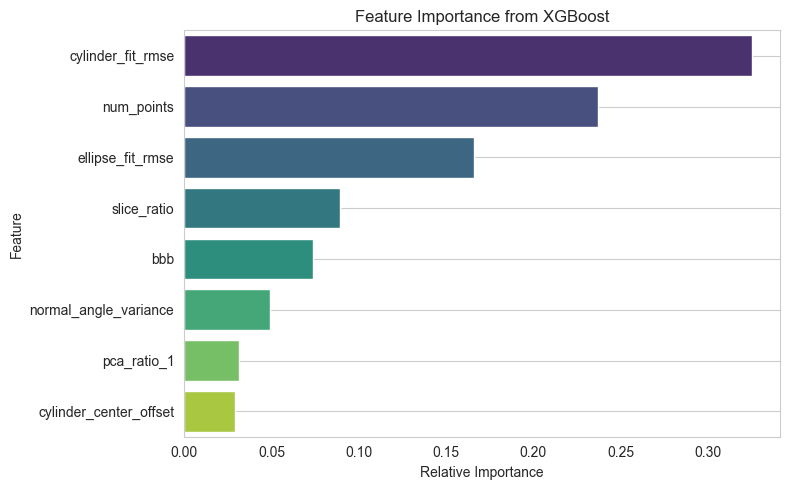

In [95]:

# 特徵重要性分析
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 顯示重要性表格
print(feature_importance_df)

# 長條圖
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from XGBoost")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid()
plt.show()

訓練集大小: 12, 測試集大小: 12
反向訓練 RMSE（test→train）: 1.717


C:\Users\Ron jian\AppData\Local\Temp\ipykernel_19492\582053612.py:53: UserWarning: Glyph 21453 (\N{CJK UNIFIED IDEOGRAPH-53CD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ron jian\AppData\Local\Temp\ipykernel_19492\582053612.py:53: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ron jian\AppData\Local\Temp\ipykernel_19492\582053612.py:53: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ron jian\AppData\Local\Temp\ipykernel_19492\582053612.py:53: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ron jian\AppData\Local\Temp\ipykernel_19492\582053612.py:53: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Ron jian\AppData\Local\Temp\ipykernel_19492\582053612.py:53: UserWarning: Glyph 10141 (\N{TRIANGLE-HEADED 

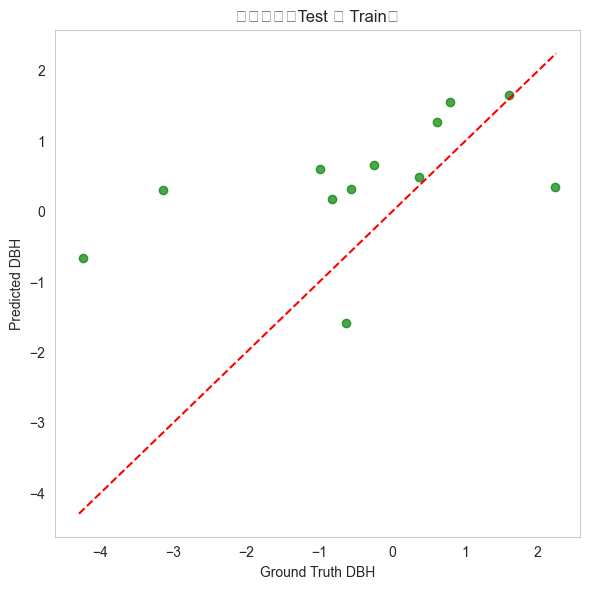

已儲存反向預測結果至 reverse_train_predictions.xlsx
    id  ground_truth_dbh  predicted_dbh     error
4    4             -0.63      -1.585010  0.955010
9    9             -0.25       0.658528  0.908528
18  18             -3.14       0.303463  3.443463
1    1             -0.82       0.185037  1.005037
22  22              0.62       1.268660  0.648660


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# 讀取資料
df = pd.read_excel("dataset.xlsx")

# 若已有 id 欄位，這步可省略；若沒有，建立唯一 id
if "id" not in df.columns:
    df = df.reset_index().rename(columns={"index": "id"})

# 建立誤差欄位
df["error"] = abs(df["dbh_cylinder_cm"] - df["dbh_gt_cm1"])
df["high_error"] = df["error"] > 2

# 選擇特徵與標籤
features = [
    "slice_ratio", "ellipse_fit_rmse", "num_points",
    "normal_angle_variance", "cylinder_fit_rmse",
    "pca_ratio_1", "cylinder_center_offset"
]
X = df[features]
y = df["aaa"]  # 可改為 df["dbh_gt_cm1"]
strata = df["high_error"]
id_col = df["id"]

# 分割資料（保留 index）
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, id_col, stratify=strata, test_size=0.5, random_state=42
)

print(f"訓練集大小: {len(X_train)}, 測試集大小: {len(X_test)}")

# --- 反向訓練 ---
model_rev = XGBRegressor(n_estimators=10, learning_rate=0.3, max_depth=3, random_state=42)
model_rev.fit(X_test, y_test)
y_pred_rev = model_rev.predict(X_train)
rmse_rev = np.sqrt(mean_squared_error(y_train, y_pred_rev))
print("反向訓練 RMSE（test→train）:", round(rmse_rev, 3))

# --- 視覺化 ---
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_rev, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Ground Truth DBH")
plt.ylabel("Predicted DBH")
plt.title("反向訓練（Test ➝ Train）")
plt.grid()
plt.tight_layout()
plt.show()

train_results = X_train.copy()
train_results["id"] = id_train.values
train_results["ground_truth_dbh"] = y_train.values
train_results["predicted_dbh"] = y_pred_rev
train_results["error"] = abs(train_results["ground_truth_dbh"] - train_results["predicted_dbh"])

# 儲存為 Excel
train_results.to_excel("reverse_train_predictions.xlsx", index=False)
print("已儲存反向預測結果至 reverse_train_predictions.xlsx")
print(train_results[["id", "ground_truth_dbh", "predicted_dbh", "error"]].head())




In [17]:
# 建立測試集結果表格
test_results = df.loc[test_indices, :].copy()
test_results["predicted_dbh"] = y_pred
test_results["error"] = abs(test_results["aaa"] - test_results["predicted_dbh"])

# 儲存結果到 Excel
test_results.to_excel("test_predictions.xlsx", index=False)
print("已儲存測試預測結果至 test_predictions.xlsx")
print(test_results[["aaa", "predicted_dbh", "error"]].head())  # 預覽前幾筆

已儲存測試預測結果至 test_predictions.xlsx
     aaa  predicted_dbh     error
16  0.33       0.214324  0.115676
15  1.66       0.314871  1.345129
5  -1.15      -0.298067  0.851933
19  0.19       0.450503  0.260503
20  2.25       0.552069  1.697931


訓練集大小: 14, 測試集大小: 10

分類報告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

訓練集類別分布：
class
0    0.714286
1    0.285714
Name: proportion, dtype: float64

測試集類別分布：
class
0    0.8
1    0.2
Name: proportion, dtype: float64


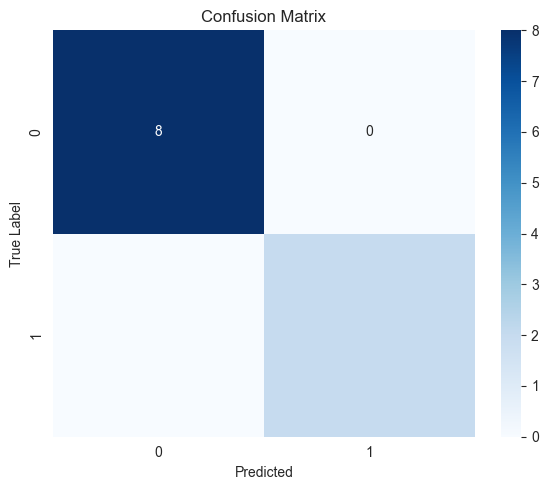

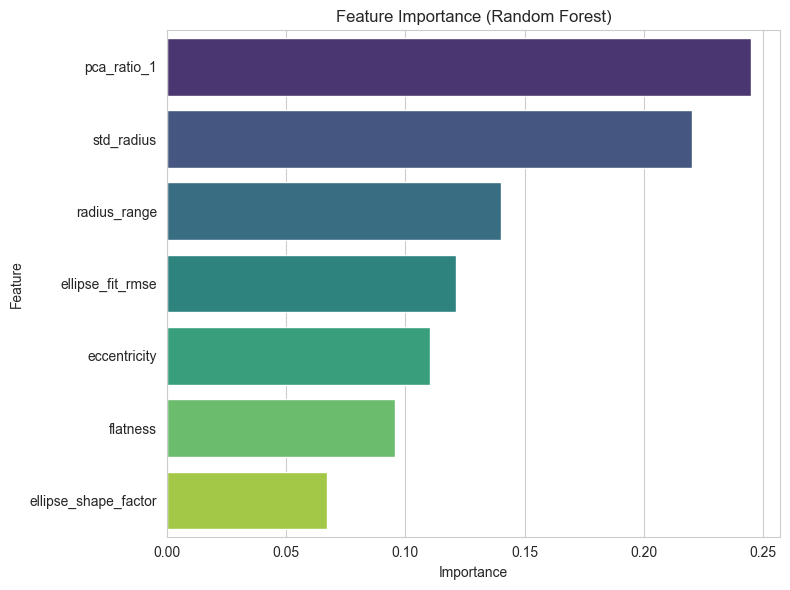

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
df = pd.read_excel("dataset_class.xlsx")

# 如果沒有 id 就建立
if "id" not in df.columns:
    df = df.reset_index().rename(columns={"index": "id"})

# 選擇特徵與分類標籤
features = [
   "std_radius",  
    "pca_ratio_1",  "radius_range",
    "flatness", "eccentricity", "ellipse_fit_rmse", "ellipse_shape_factor"
]
X = df[features]
y = df["class"]

# 分割資料集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=42
)

print(f"訓練集大小: {len(X_train)}, 測試集大小: {len(X_test)}")

# 建立 Random Forest 分類器
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=4,
    class_weight="balanced",  # 處理類別不平衡
    random_state=42,
    n_jobs=-1  # 使用所有 CPU 加速
)

# 模型訓練
model.fit(X_train, y_train)

# 預測與評估
y_pred = model.predict(X_test)

# 分類報告
print("\n分類報告：")
print(classification_report(y_test, y_pred))

# 類別分布檢查
print("訓練集類別分布：")
print(y_train.value_counts(normalize=True))
print("\n測試集類別分布：")
print(y_test.value_counts(normalize=True))

# 混淆矩陣視覺化
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 顯示特徵重要性
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [100]:
# 模型訓練（如前已訓練過，此處可略過）
# model.fit(X_train, y_train)

# 預測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 產生結果 DataFrame（包含：filename, true_label, pred_label）
train_results = df.loc[y_train.index, ["filename"]].copy()
train_results["true_label"] = y_train.values
train_results["pred_label"] = y_train_pred

test_results = df.loc[y_test.index, ["filename"]].copy()
test_results["true_label"] = y_test.values
test_results["pred_label"] = y_test_pred

# 顯示預測結果
print("\n【訓練集預測結果】：")
print(train_results.reset_index(drop=True))

print("\n【測試集預測結果】：")
print(test_results.reset_index(drop=True))



【訓練集預測結果】：
    filename  true_label  pred_label
0         13           0           0
1        116           1           1
2         34           0           0
3         40           1           1
4          5           1           1
5         96           0           0
6         10           0           0
7          4           0           0
8         43           0           0
9          3           0           0
10       108           0           0
11       122           1           1
12       123           0           0
13       127           0           0

【測試集預測結果】：
   filename  true_label  pred_label
0       103           1           1
1        18           0           0
2        23           0           0
3        97           0           0
4        12           0           0
5        41           0           0
6        38           1           1
7         8           0           0
8        57           0           0
9        42           0           0


In [101]:
# 讀取新資料（必須包含相同的特徵欄位）
new_data = pd.read_excel("dataset.xlsx")

# 確保欄位順序一致
new_X = new_data[features]

# 做預測
new_data["predicted_class"] = model.predict(new_X)


# 儲存結果
new_data.to_excel("prediction_results.xlsx", index=False)
